In [207]:
#Using FIFA 2018 World Cup Stats to develop a ML algorithm to predict which teams player will win Man of the Match 


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_a838c3d347e94831bfc461447b0694b1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='O7xuyFeiPsQngvJUmRubfBGRa1CjG3ulDbSzXUVYWnsJ',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a838c3d347e94831bfc461447b0694b1.get_object(Bucket='henryujupyternbprj1-donotdelete-pr-aunzc4zwcvubiv',Key='FIFA 2018 Statistics.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [208]:
#check if dataframe has any null values
#dataframe has null values in 1st Goal, Own goals and Own goal Time.

print('Data has NULL value in: ')
df.isnull().any()

Data has NULL value in: 


Date                      False
Team                      False
Opponent                  False
Goal Scored               False
Ball Possession %         False
Attempts                  False
On-Target                 False
Off-Target                False
Blocked                   False
Corners                   False
Offsides                  False
Free Kicks                False
Saves                     False
Pass Accuracy %           False
Passes                    False
Distance Covered (Kms)    False
Fouls Committed           False
Yellow Card               False
Yellow & Red              False
Red                       False
Man of the Match          False
1st Goal                   True
Round                     False
PSO                       False
Goals in PSO              False
Own goals                  True
Own goal Time              True
dtype: bool

In [209]:
#Rename some of the columns in the pandas dataframe for easier referencing

df = df.rename(columns={'On-Target':'OnTarget', 'Ball Possession %':'BallPossession', 'Pass Accuracy %':'PassAccuracy', 'Distance Covered (Kms)':'DistanceCovered',
                        'Goal Scored': 'GoalScored'})

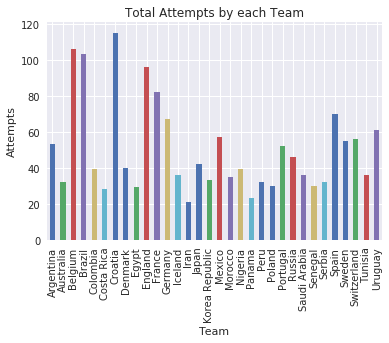

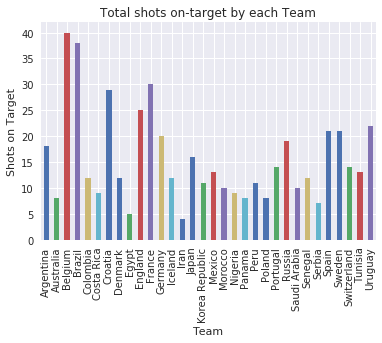

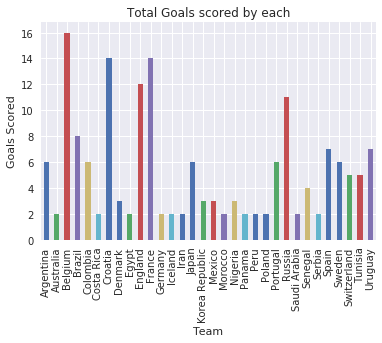

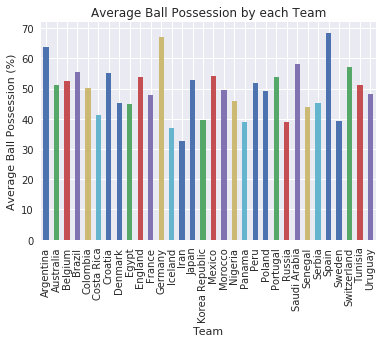

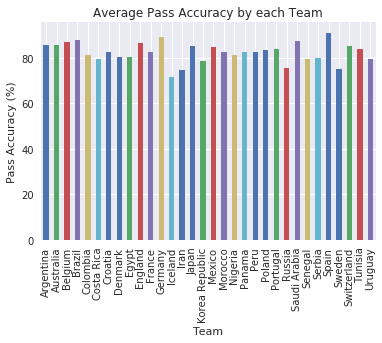

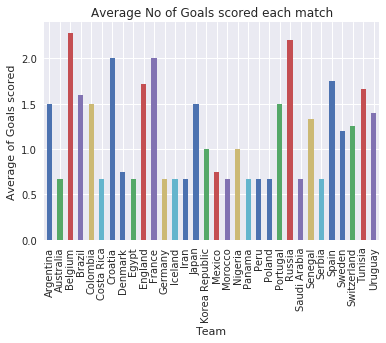

In [210]:
#Visualize each teams average and total performance during the World Cup.
#Croatia had the most attempts on goal, Belgium had the most shots on target and number of goals, Spain had the highest avg ball possession and pass accuracy, Belgium and Russia averaged above 2 goals per game played.  

var = df.groupby('Team').Attempts.sum()
var1 = df.groupby('Team').OnTarget.sum()
var2 = df.groupby('Team').GoalScored.sum()
var3 = df.groupby('Team').BallPossession.mean()
var4 = df.groupby('Team').PassAccuracy.mean()
var5 = df.groupby('Team').GoalScored.mean()

plt.figure()
#plt.subplot(411)
var.plot(kind='bar')
plt.title("Total Attempts by each Team")
plt.xlabel('Team')
plt.ylabel('Attempts');

plt.figure()
var1.plot(kind='bar')
plt.title("Total shots on-target by each Team")
plt.xlabel('Team')
plt.ylabel('Shots on Target');

plt.figure()
var2.plot(kind='bar')
plt.title("Total Goals scored by each")
plt.xlabel('Team')
plt.ylabel('Goals Scored');

plt.figure()
var3.plot(kind='bar')
plt.title("Average Ball Possession by each Team")
plt.xlabel('Team')
plt.ylabel('Average Ball Possession (%)');

plt.figure()
var4.plot(kind='bar')
plt.title("Average Pass Accuracy by each Team")
plt.xlabel('Team')
plt.ylabel('Pass Accuracy (%)');

plt.figure()
var5.plot(kind='bar')
plt.title("Average No of Goals scored each match")
plt.xlabel('Team')
plt.ylabel('Average of Goals scored');



In [211]:
#drop coulmns with missing values
#The team names were also replaced with indices to pass commands much easier
#The ML problem here is a Binary classification one. 1 for if the Man of the Match comes from the Team and 0 if he doesn't.

df = df.drop(['1st Goal','Own goals', 'Own goal Time', 'Round'], axis=1)

df = df.replace(to_replace={'Russia':1, 'Saudi Arabia':2, 'Egypt':3, 'Uruguay':4, 'Morocco':5, 'Iran':6, 'Portugal':7, 'Spain':8, 'France':9, 'Australia':10,'Argentina':11, 'Iceland':12, 'Peru':13, 'Denmark':14,
                            'Croatia':15, 'Nigeria':16, 'Costa Rica':17, 'Serbia':18, 'Germany':19, 'Mexico':20, 'Brazil':21, 'Switzerland':22, 'Sweden':23, 'Korea Republic':24, 'Belgium':25, 'Panama':26, 'Tunisia':27,
                           'England': 28, 'Colombia': 29, 'Japan': 30, 'Poland':31, 'Senegal':32, 'No':0, 'Yes':1})

In [212]:
df.head()

,Date,Team,Opponent,GoalScored,BallPossession,Attempts,OnTarget,Off-Target,Blocked,Corners,...,PassAccuracy,Passes,DistanceCovered,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,PSO,Goals in PSO
0,14-06-2018,1,2,5,40,13,7,3,3,6,...,78,306,118,22,0,0,0,1,0,0
1,14-06-2018,2,1,0,60,6,0,3,3,2,...,86,511,105,10,0,0,0,0,0,0
2,15-06-2018,3,4,0,43,8,3,3,2,0,...,78,395,112,12,2,0,0,0,0,0
3,15-06-2018,4,3,1,57,14,4,6,4,5,...,86,589,111,6,0,0,0,1,0,0
4,15-06-2018,5,6,0,64,13,3,6,4,5,...,86,433,101,22,1,0,0,0,0,0


In [213]:
df.columns

Index(['Date', 'Team', 'Opponent', 'GoalScored', 'BallPossession', 'Attempts',
       'OnTarget', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'PassAccuracy', 'Passes', 'DistanceCovered',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
       'Man of the Match', 'PSO', 'Goals in PSO'],
      dtype='object')

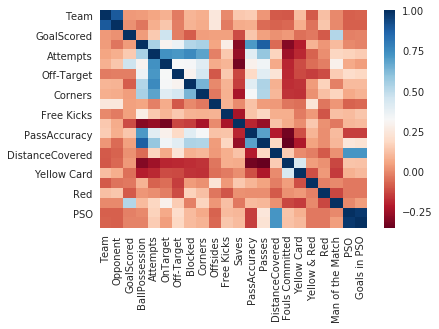

In [214]:
#Visualize correlation heatmap of features
sns.heatmap(df.corr(),cmap='RdBu');

In [215]:
#From the correleation heatmap above, we can clearly see that there is a strong positive correlation between Man of the Match and Goal Scored i.e. A team with high scoring player is likely to win the Man of the Match
# There is also high positive correlation between Attempts and Ball Possession, OnTarget shots, OffTarget shots, Blocked shots, Corners.

In [216]:
#df.describe()

In [217]:
#create a spark dataframe of the data to allow sparkML pipelining

spark_df = spark.createDataFrame(df)

In [218]:
spark_df

DataFrame[Date: string, Team: bigint, Opponent: bigint, GoalScored: bigint, BallPossession: bigint, Attempts: bigint, OnTarget: bigint, Off-Target: bigint, Blocked: bigint, Corners: bigint, Offsides: bigint, Free Kicks: bigint, Saves: bigint, PassAccuracy: bigint, Passes: bigint, DistanceCovered: bigint, Fouls Committed: bigint, Yellow Card: bigint, Yellow & Red: bigint, Red: bigint, Man of the Match: bigint, PSO: bigint, Goals in PSO: bigint]

In [219]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols=["Team","Opponent","GoalScored", "BallPossession", "Attempts", "OnTarget", "Off-Target", "Blocked", "Corners", "Offsides", "Free Kicks", "Saves", "PassAccuracy",
                                             "Passes", "DistanceCovered", "Fouls Committed", "Yellow Card", "Yellow & Red", "Red", "PSO", "Goals in PSO"], outputCol="features")

#features_vectorized = vectorAssembler.transform(spark_df)
#features_vectorized.show()

In [220]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol = "Man of the Match", outputCol="label")

#indexed = indexer.fit(spark_df).transform(spark_df)
#indexed.show()

In [221]:
from pyspark.ml.classification import LogisticRegression

classifier = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [222]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[indexer, vectorAssembler, classifier])

In [223]:
model = pipeline.fit(spark_df)

In [224]:
prediction = model.transform(spark_df)
prediction.show()

+----------+----+--------+----------+--------------+--------+--------+----------+-------+-------+--------+----------+-----+------------+------+---------------+---------------+-----------+------------+---+----------------+---+------------+-----+--------------------+--------------------+--------------------+----------+
|      Date|Team|Opponent|GoalScored|BallPossession|Attempts|OnTarget|Off-Target|Blocked|Corners|Offsides|Free Kicks|Saves|PassAccuracy|Passes|DistanceCovered|Fouls Committed|Yellow Card|Yellow & Red|Red|Man of the Match|PSO|Goals in PSO|label|            features|       rawPrediction|         probability|prediction|
+----------+----+--------+----------+--------------+--------+--------+----------+-------+-------+--------+----------+-----+------------+------+---------------+---------------+-----------+------------+---+----------------+---+------------+-----+--------------------+--------------------+--------------------+----------+
|14-06-2018|   1|       2|         5|      

In [225]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")

print('Accuracy of model is: ')
binEval.evaluate(prediction) 



Accuracy of model is: 


0.71875